# **Assignment 2: Homework and Lab**

## Homework

In [1]:
#%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 10})
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import gridspec
from scipy.linalg import expm
from scipy.linalg import solve_discrete_lyapunov
from scipy.linalg import sqrtm

np.set_printoptions(precision=3)
import math
plt.rcParams["font.serif"] = "cmr14"
plt.rcParams['savefig.dpi'] = 300
plt.rcParams["figure.dpi"] = 150

### Solution Problem 1 <font color='red' size=3>[5 points total]</font>

1. Note that, in general, $g=g(x,\dot{x},t)$, where $x$ and $\dot{x}$ may depend on time. In this case, we
are told that $g=g(\dot{x})$, and hence the Euler equation becomes

$$
\frac{d}{dt}\left(\frac{\partial g}{\partial\dot{x}}\right)=0
$$

Using now the chain rule:

$$
\frac{d}{dt}\left(\frac{\partial g}{\partial\dot{x}}\right)=\underbrace{\frac{\partial\left(\frac{\partial g(\dot{x})}{\partial\dot{x}}\right)}{\partial x}}_{=0}\frac{\partial x}{\partial t}+\frac{\partial\left(\frac{\partial g(\dot{x})}{\partial\dot{x}}\right)}{\partial\dot{x}}\frac{\partial\dot{x}}{\partial t}+\underbrace{\frac{\partial\left(\frac{\partial g(\dot{x})}{\partial\dot{x}}\right)}{\partial t}}_{=0}=\frac{\partial\left(\frac{\partial g(\dot{x})}{\partial\dot{x}}\right)}{\partial\dot{x}}\frac{\partial\dot{x}}{\partial t}=0
$$

where we have used the fact that $g=g(\dot{x})$ means that $\frac{\partial g(\dot{x})}{\partial\dot{x}}$
does not depend explicitly on $x$ or $t$. Now we can see that, if
$x(t)$ is a linear function of time, then $\frac{\partial\dot{x}}{\partial t}=0$
and hence the equation is satisfied.

<br>

| <font color='red'>Grading Issue</font> | <font color='red'>Point Deduction</font> |
|----------------------------------------|------------------------------------------|
| incorrect / missing discussion         | -2                                       |

<br>

2. Differentiating $g - \dot{x}\frac{\partial g}{\partial \dot{x}}$ w.r.t $t$ gives

$$
\begin{align}
\frac{d}{dt}\left\{g(x,\dot{x}) - \dot{x}\frac{\partial g}{\partial \dot{x}} \right\} &= \frac{\partial g}{\partial x}\dot{x} + \frac{\partial g}{\partial \dot{x}}\ddot{x} - \ddot{x}\frac{\partial g}{\partial \dot{x}} - \dot{x}\frac{d}{dt}\frac{\partial g}{\partial \dot{x}} \\
&= \dot{x}\left( \frac{\partial g}{\partial x} - \frac{d}{dt} \frac{\partial g}{\partial \dot{x}} \right) = 0
\end{align},
$$

with equality to zero if the Euler equation is satisfied. Therefore $g - \dot{x}\frac{\partial g}{\partial \dot{x}}$ is a constant.

<br>

| <font color='red'>Grading Issue</font> | <font color='red'>Point Deduction</font> |
|----------------------------------------|------------------------------------------|
| incorrect / missing discussion         | -3                                       |

$\newcommand{\njbu}{\mathbf{u}}
\newcommand{\njbf}{\mathbf{f}}
\newcommand{\njbg}{\mathbf{g}}
\newcommand{\njbh}{\mathbf{h}}
\newcommand{\njba}{\mathbf{a}}
\newcommand{\njbb}{\mathbf{b}}
\newcommand{\njbi}{\mathbf{i}}
\newcommand{\njbe}{\mathbf{e}}
\newcommand{\njbd}{\mathbf{d}}
\newcommand{\njbp}{\mathbf{p}}
\newcommand{\njbq}{\mathbf{q}}
\newcommand{\njbr}{\mathbf{r}}
\newcommand{\njby}{\mathbf{y}}
\newcommand{\njbv}{\mathbf{v}}
\newcommand{\njbw}{\mathbf{w}}
\newcommand{\njbx}{\mathbf{x}}
$

### Solution Problem 2 <font color='red' size=3>[10 points total]</font>

1) Hamiltonian:
$$
H = g +\njbp(t)^T \njbf 
= (1+\alpha u_1^2+\alpha u_2^2) + p_1 (V\cos \theta(t))+ p_2 (V\sin \theta(t)) + p_3 u_1 + p_4 u_2
$$

With state $\njbx = \left[\begin{array}{ccc} x & y & \theta & V \end{array} \right]^T$, necessary conditions give 
\begin{eqnarray}
\dot \njbx &=& \njbf(\njbx,\njbu,t) \\
\dot \njbp &=& -H_\njbx^T \\
H_\njbu &=& 0 \\[1em]
\dot{p_1}(t) & = & 0\\
\dot{p_2}(t) & = & 0\\
\dot{p_3}(t) & = & p_1 V\sin \theta(t) - p_2 V\cos \theta(t)\\
\dot{p_4}(t) & = & - p_1 \cos \theta(t) - p_2 \sin \theta(t)\\
2 \alpha u_1 + p_3 &=&0 \\
2 \alpha u_2 + p_4 &=&0 \\
\end{eqnarray}

The state boundary conditions are as given - since 
$t_f$ free, must add terminal condition that
$H(t_f)=0$.

<br>

| <font color='red'>Grading Issue</font> | <font color='red'>Point Deduction</font> |
|----------------------------------------|------------------------------------------|
| incorrect Hamiltonian                  | -1                                       |
| incorrect necessary conditions         | -2                                       |
| missing terminal condition $H(t_f)=0$  | -1                                       |

<br>

2) See code below -- for these state conditions we get $t_f=4.151$ seconds

<br>

| <font color='red'>Grading Issue</font>        | <font color='red'>Point Deduction</font> |
|-----------------------------------------------|------------------------------------------|
| incorrect result (i.e., bad plots) | -2                                       |

<br>

3) For this case I get $t_f = 2.298$s -- what is interesting is that the vehicle does a sharp left turn and then backs up into the terminal condition, which makes sense.

<br>

| <font color='red'>Grading Issue</font>        | <font color='red'>Point Deduction</font> |
|-----------------------------------------------|------------------------------------------|
| incorrect result (i.e., bad plots, bad $t_f$) | -2                                       |
| missing discussion                            | -1                                       |

In [ ]:
## Dubins car code for HW2 problem 2
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import shutil
import sys
import os.path
print(shutil.which("ipopt"))
from pyomo.environ import *
from pyomo.dae import *

float_formatter = "{:.3f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})
np.set_printoptions(precision=3)
plt.rcParams["font.serif"] = "cmr10"

# parameters
alp = 0.1

# create a model object
m = ConcreteModel()

# define the independent variable
m.tf = Var(domain=NonNegativeReals)
m.t = ContinuousSet(bounds=(0, 1))

# define the dependent variables
m.x = Var(m.t)
m.y = Var(m.t)
m.th = Var(m.t)
m.V = Var(m.t)
m.p1 = Var(m.t)
m.p2 = Var(m.t)
m.p3 = Var(m.t)
m.p4 = Var(m.t)

# define derivatives
m.x_dot = DerivativeVar(m.x)
m.y_dot = DerivativeVar(m.y)
m.th_dot = DerivativeVar(m.th)
m.V_dot = DerivativeVar(m.V)
m.p1_dot = DerivativeVar(m.p1)
m.p2_dot = DerivativeVar(m.p2)
m.p3_dot = DerivativeVar(m.p3)
m.p4_dot = DerivativeVar(m.p4)

# define the differential equation as constraints
m.ode_x = Constraint(m.t, rule=lambda m, t: m.x_dot[t] == m.tf*(m.V[t]*cos(m.th[t])))
m.ode_y = Constraint(m.t, rule=lambda m, t: m.y_dot[t] == m.tf*(m.V[t]*sin(m.th[t])))
m.ode_th = Constraint(m.t, rule=lambda m, t: m.th_dot[t] == m.tf*(-m.p3[t]/2/alp))
m.ode_V = Constraint(m.t, rule=lambda m, t: m.V_dot[t] == m.tf*(-m.p4[t]/2/alp))
m.ode_p1 = Constraint(m.t, rule=lambda m, t: m.p1_dot[t] == m.tf*(0))
m.ode_p2 = Constraint(m.t, rule=lambda m, t: m.p2_dot[t] == m.tf*(0))
m.ode_p3 = Constraint(m.t, rule=lambda m, t: m.p3_dot[t] == m.tf*m.V[t]*(m.p1[t]*sin(m.th[t])-m.p2[t]*cos(m.th[t])))
m.ode_p4 = Constraint(m.t, rule=lambda m, t: m.p4_dot[t] == -m.tf*(m.p1[t]*cos(m.th[t])+m.p2[t]*sin(m.th[t])))

m.pc = ConstraintList()
if 1:
    # initial conditions
    m.pc.add(m.x[0]==0)
    m.pc.add(m.y[0]==0)
    m.pc.add(m.th[0]==0)
    m.pc.add(m.V[0]==4)
    # final conditions
    m.pc.add(m.x[1]==10)
    m.pc.add(m.y[1]==10)
    m.pc.add(m.th[1]== 0)
    m.pc.add(m.V[1]==0)
else:
    # initial conditions
    m.pc.add(m.x[0]==0)
    m.pc.add(m.y[0]==0)
    m.pc.add(m.th[0]==0)
    m.pc.add(m.V[0]==0)
    # final conditions
    m.pc.add(m.x[1]==1)
    m.pc.add(m.y[1]==0)
    m.pc.add(m.th[1]== np.pi)
    m.pc.add(m.V[1]==0)  

m.pc.add(1+alp*(-m.p3[1]/2/alp)**2+alp*(-m.p4[1]/2/alp)**2+m.p1[1]*m.V[1]*cos(m.th[1])+m.p2[1]*m.V[1]*sin(m.th[1])+m.p3[1]*(-m.p3[1]/2/alp)+m.p4[1]*(-m.p4[1]/2/alp) == 0)

# transform and solve
#TransformationFactory('dae.finite_difference').apply_to(m, nfe=400)
discretizer = TransformationFactory('dae.collocation')
discretizer.apply_to(m,wrt=m.t,nfe=200,ncp=3,scheme='LAGRANGE-RADAU')
solver = SolverFactory('ipopt')
#solver.options['max_iter']= 10000 #number of iterations you wish
solver.solve(m).write()

print('mission length = ' + str(round(m.tf(),3)) + ' seconds')

# access the results
t = np.array([t*m.tf() for t in m.t])
x = np.array([m.x[t]() for t in m.t])
y = np.array([m.y[t]() for t in m.t])
theta = np.array([m.th[t]() for t in m.t])
V = np.array([m.V[t]() for t in m.t])

p1 = np.array([m.p1[t]() for t in m.t])
p2 = np.array([m.p2[t]() for t in m.t])
p3 = np.array([m.p3[t]() for t in m.t])
p4 = np.array([m.p4[t]() for t in m.t])
u1 = -np.array([m.p3[t]() for t in m.t])/2/alp
u2 = -np.array([m.p4[t]() for t in m.t])/2/alp

plt.figure(figsize=(8,6))
plt.plot(t, x, ls='-',label='x')
plt.plot(t, y, ls='--',label='y')
plt.plot(t, theta, ls='--',label=r'$\theta$')
plt.plot(t, V, ls=':',label='V')
plt.xlabel('time')
plt.ylabel('x')
plt.title('Dubins - mission length = ' + str(round(m.tf(),3)) + ' seconds')
plt.legend()
plt.grid(True)
plt.xlim([0,m.tf()])
plt.savefig("DubinsV1.png")

plt.figure(figsize=(8,6))
plt.plot(t, u1, 'r-',label='u1')
plt.plot(t, u2, 'r--',label='u2')
plt.xlabel('time')
plt.ylabel('x')
plt.title('Dubins - mission length = ' + str(round(m.tf(),3)) + ' seconds')
plt.legend()
plt.grid(True)
plt.xlim([0,m.tf()])
plt.savefig("DubinsV2.png")

plt.figure(figsize=(8,6))
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Dubins - mission length = ' + str(round(m.tf(),3)) + ' seconds')
plt.grid(True)
plt.text(0.5,0,r'$\alpha$='+ str(round(alp,2)))
plt.savefig("DubinsV3.png")



####  Pyomo + IPOPT Output

<div align="center">
  <img src="http://drive.google.com/uc?export=view&id=1a0oytVtep7dX78MGFCIT0-6vvP8xZUcW" alt="problem description" width="70%" />
</div>

(https://drive.google.com/file/d/1a0oytVtep7dX78MGFCIT0-6vvP8xZUcW/view?usp=sharing)

### Solution Problem 3 <font color='red' size=3>[10 points total]</font>

Using $g(x,\dot{x}) = \frac{1}{2}\dot{x}^2 + 3x\dot{x} + 2x^2 + 4x$, Euler's equation is

$$
g_x - \frac{d}{dt}g_\dot{x} = 3\dot{x} + 4x + 4 - \frac{d}{dt}\left[\dot{x}+3x\right] = 0\\
\ddot{x} - 4x - 4 =0
$$

Let $x = x_h + x_p$ where $\ddot{x}_h - 4x_h = 0$, and $x_p$ is a particular solution of the equation above. Using the characteristic equation gives,

$$
\lambda^2 - 4 = 0 \implies \lambda = \pm 2 \\
x_h = c_1 e^{2t} + c_2 e^{-2t}
$$

For this problem, $x_p = const = c_3$, so

$$
-4c_3 = 4 \implies c_3 = -1
$$

Therefore,

$$
x(t) = -1 + c_1e^{2t} + c_2e^{-2t}
$$

We can determine $c_1$ and $c_2$ from the specified initial and final values

$$
\begin{align}
x(0) &= -1 + c_1 + c_2 = 1 \\
x(1) &= -1 + c_1e^2 + c_2 e^{-2} = 5
\end{align}
$$

Solving for $c_1$ and $c_2$ gives

$$
c_1 = \frac{6-2e^{-2}}{e^2-e^{-2}}, \qquad
c_2 = \frac{2e^2-6}{e^2-e^{-2}}
$$

Therefore,

$$
x^*(t) = \frac{6-2e^{-2}}{e^2-e^{-2}} e^{2t} + \frac{2e^2-6}{e^2-e^{-2}} e^{-2t} - 1
= 0.7898e^{2t} + 1.210e^{-2t} - 1
$$

<br>


ok
optimal
ok
optimal


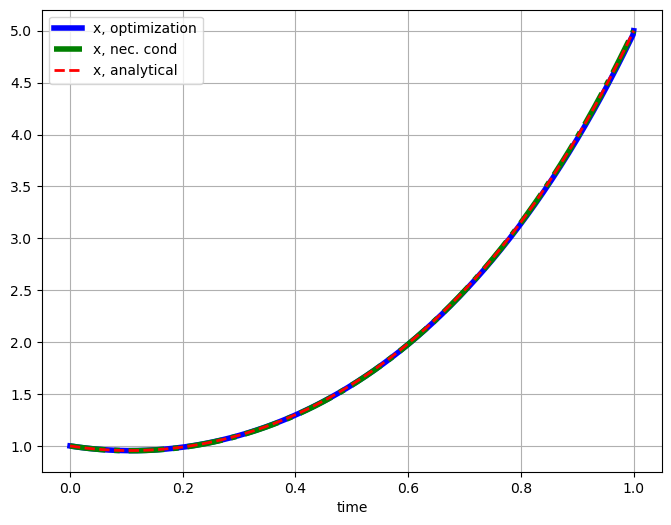

In [5]:
from pyomo.environ import *
from pyomo.dae import *
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('default')


#### Solution via optimization
m = ConcreteModel()
m.t = ContinuousSet(bounds=(0,1))

m.x = Var(m.t)
m.xdot = DerivativeVar(m.x,wrt=m.t)
m.x[0].fix(1)
m.x[1].fix(5)

def _intX(m,t):
  return 0.5*m.xdot[t]**2+3*m.x[t]*m.xdot[t]+2*m.x[t]**2 + 4*m.x[t]
m.intX = Integral(m.t, wrt = m.t, rule = _intX)

m.obj = Objective(expr = m.intX, sense=minimize)

TransformationFactory('dae.finite_difference').apply_to(m, wrt=m.t, nfe=1000)
solver = SolverFactory('ipopt', keepfiles=True, log_file='log', soln_file='sol')
results_m = solver.solve(m)
print(results_m.solver.status)
print(results_m.solver.termination_condition)

#### Solution via necessary conditions
n = ConcreteModel()
n.t = ContinuousSet(bounds=(0,1))

n.x = Var(n.t)
n.xdot = DerivativeVar(n.x,wrt=n.t)
n.xdotdot = DerivativeVar(n.xdot,wrt=n.t)
n.x[0].fix(1)
n.x[1].fix(5)

n.nec_cond = Constraint(n.t, rule=lambda n, t: n.xdotdot[t] - 4*n.x[t] - 4 == 0)

TransformationFactory('dae.finite_difference').apply_to(n, wrt=n.t, nfe=200)
solver = SolverFactory('ipopt', keepfiles=True, log_file='log', soln_file='sol')
results_n = solver.solve(n)
print(results_n.solver.status)
print(results_n.solver.termination_condition)

#### Plots
if (results_m.solver.termination_condition == 'optimal' and results_n.solver.termination_condition == 'optimal'):
  # access the results
  tt_m = np.array([t for t in m.t])
  x_m = np.array([m.x[t]() for t in m.t])

  tt_n = np.array([t for t in n.t])
  x_n = np.array([n.x[t]() for t in n.t])

  tt = tt_n
  x_analytical = (6-2*exp(-2))/(exp(2)-exp(-2))*np.exp(2*tt) + (2*exp(2)-6)/(exp(2)-exp(-2))*np.exp(-2*tt) -1

  plt.figure(figsize=(8,6))
  plt.plot(tt_m,x_m, 'b-',lw=4)
  plt.plot(tt_n,x_n, 'g-.',lw=4)
  plt.plot(tt, x_analytical, 'r--',lw=2)
  plt.xlabel('time')
  plt.legend(['x, optimization','x, nec. cond','x, analytical'])
  plt.grid(True)
  plt.show()
else:
  print('Optimization Failed')

| <font color='red'>Grading Issue</font>                 | <font color='red'>Point Deduction</font> |
|--------------------------------------------------------|------------------------------------------|
| incorrect homogeneous solution $x_h$               | -1                                       |
| incorrect particular solution $x_p$                | -1                                       |
| did not use boundary conditions to solve for constants | -2                                       |
| incorrect/missing solution using pyomo-optimization | -2                                       |
| incorrect/missing solution using pyomo-necessary conditions | -2                                       |

### Solution Problem 4 <font color='red' size=3>[10 points total]</font>
$\newcommand{\expec}{{\Bbb E}}$
$\newcommand{\expect}[1]{\expec\left[ #1 \right]}$
$\newcommand{\mb}{\mathbf}$

#### Part 1
Consider the case where $\omega_c T_\omega = 10$, that is, the noise with PSD $S_1(w)$ is bandlimited at a frequency that is an order of magnitude larger than the break frequency of the filter $G(s) = 1/(T_\omega s +1)$.  Plots of the three functions are given below.

<br>

| <font color='red'>Grading Issue</font> | <font color='red'>Point Deduction</font> |
|----------------------------------------|------------------------------------------|
| incorrect / incomplete plots           | -2                                       |

#### Part 2
For the low-pass filter driven by bandlimited white noise,
\begin{align*}
S_{y_1}(j\omega) = |G(j\omega)|^2 S_1(j\omega) = \left\{ \begin{array}{cl} \frac{A}{T_\omega^2 \omega^2 + 1} & |\omega| \leq \omega_c \\ 0 & |\omega| > \omega_c \end{array} \right.
\end{align*}
For the low-pass filter driven by pure white noise,
\begin{align*}
S_{y_2}(j\omega) = |G(j\omega)|^2 S_2(j\omega) = \frac{A}{T_\omega^2 \omega^2 + 1}, \forall \omega.
\end{align*}

Plots for these output PSDs are given below.

<br>

| <font color='red'>Grading Issue</font> | <font color='red'>Point Deduction</font> |
|----------------------------------------|------------------------------------------|
| incorrect expressions or plots         | -2                                       |

#### Part 3
In general, for zero-mean stationary processes,
\begin{align*}
\expect{y^2(t)} &= R_y(0) = \frac{1}{2\pi} \int_{-\infty}^{\infty} S_y(j\omega) d\omega.
\end{align*}

-- For the low-pass filter driven by bandlimited white noise,
\begin{align}
\expect{y^2(t)} &= \frac{1}{2\pi} \int_{-\infty}^{\infty} S_{y_1}(j\omega) d\omega\\
&= \frac{1}{2\pi} \int_{-\omega_c}^{\omega_c} \frac{A}{T_\omega^2 \omega^2 + 1} d\omega \\
&= \frac{1}{\pi} \int_{0}^{\omega_c} \frac{A}{T_\omega^2 \omega^2 + 1}  d\omega \\
&= \frac{A}{T_\omega \pi} \left[ \tan^{-1} (T_\omega \omega) \right]_0^{\omega_c}\\
&= \frac{A}{T_\omega \pi} \tan^{-1} (T_\omega \omega_c).
\end{align}

<br>

| <font color='red'>Grading Issue</font> | <font color='red'>Point Deduction</font> |
|----------------------------------------|------------------------------------------|
| incorrect expression                   | -2                                       |

-- For the low-pass filter driven by pure white noise, take the limit of the above as $\omega_c \to \infty$:
\begin{align}
\expect{y^2(t)} &= \lim_{\omega_c \to \infty} \frac{A}{T_\omega \pi} \tan^{-1} (T_\omega \omega_c) = \frac{A}{2T_\omega}.
\end{align}

<br>

| <font color='red'>Grading Issue</font> | <font color='red'>Point Deduction</font> |
|----------------------------------------|------------------------------------------|
| incorrect expression                   | -2                                       |

#### Part 4

These results seem to confirm the statement that ``if the input spectrum is flat considerably beyond the system bandwidth, there is little error introduced by assuming that the input spectrum is flat out to infinity.''  From (a), (b), and (c), we can see that in addition to the spectral densities $S_{y_1}$ and $S_{y_2}$ being almost equal, $\expect{y} = 0$ for both, and for $2\tan^{-1}(T_\omega \omega_c) \to \pi$, then the $\expect{y^2}$ for each will be approximately equal.  So, there's a decent match between the first and second moments of the distributions.

<br>

| <font color='red'>Grading Issue</font> | <font color='red'>Point Deduction</font> |
|----------------------------------------|------------------------------------------|
| incorrect conclusion                   | -1                                       |

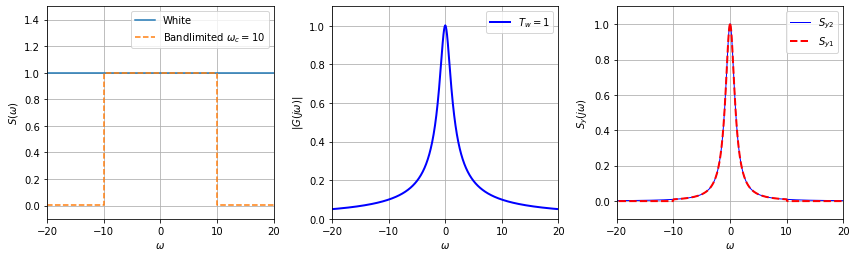

In [ ]:
fig = plt.figure(figsize=(12,4))
ax1 = plt.subplot2grid((1,3), (0,0), rowspan=1, colspan = 1)
ax2 = plt.subplot2grid((1,3), (0,1), rowspan=1, colspan = 1)
ax3 = plt.subplot2grid((1,3), (0,2), rowspan=1, colspan = 1)

T = 1
wc = 10
A = 1

omega = np.logspace(-3,2,1000)
G = np.abs(1/(1+T*omega*1j))
Sy1 = np.abs(A/(1+(T*omega)**2))
Sy1[omega > wc] = 0
Sy2 = np.abs(A/(1+(T*omega)**2))

ax1.plot([-20, 20],A*[1,1],label='White')
ax1.plot([-20, -10,-10,10,10,20],A*[0.005,0.005,1,1,0.005,0.005],'--',label=r'Bandlimited $\omega_c=10$')
ax1.set_ylim([-0.1,1.5])
ax1.set_xlim([-20,20])
ax1.set_xlabel(r'$\omega$')
ax1.set_ylabel(r'$S(\omega)$')
ax1.legend()
ax1.grid()

ax2.plot(omega,G,'b',lw=2,label=r'$T_w=1$')
ax2.plot(-omega,G,'b',lw=2)
ax2.set_ylim([0,1.1])
ax2.set_xlim([-20,20])
ax2.set_xlabel(r'$\omega$')
ax2.set_ylabel(r'$|G(j \omega)|$')
ax2.legend()
ax2.grid()

ax3.plot(omega,Sy2,'b',lw=1,label=r'$S_{y2}$')
ax3.plot(-omega,Sy2,'b',lw=1)
ax3.plot(omega,Sy1,'r--',lw=2,label=r'$S_{y1}$')
ax3.plot(-omega,Sy1,'r--',lw=2)
ax3.set_ylim([-0.1,1.1])
ax3.set_xlim([-20,20])
ax3.set_xlabel(r'$\omega$')
ax3.set_ylabel(r'$S_y(j \omega)$')
ax3.legend()
ax3.grid()
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Solution Problem 5 <font color='red' size=3>[5 points total]</font>

Substituting $\omega=-js$, we have $$\phi(s)=\frac{-s^2+4}{s^4-6s^2+25}=\frac{-(s-2)(s+2)}{(s^{2}+4s+5)(s^{2}-4s+5)}$$

Now let’s take H(s) such that it’s stable (all the poles in the left half plane). Let’s also take the zeros in
the left half plane:

$$\phi(s)=\underbrace{\frac{s+2}{s^{2}+4s+5}}_{H(s)}\cdot\underbrace{\frac{-s+2}{s^{2}-4s+5}}_{H(-s)}$$

| <font color='red'>Grading Issue</font>        | <font color='red'>Point Deduction</font> |
|-----------------------------------------------|------------------------------------------|
| incorrect/missing expression $\phi(s)$  | -1                                       |
| incorrect/missing $H(s)$                            | -3                                       |

### Solution Problem 6  <font color='red' size=3>[5 points total]</font> $%See Spr2021/Midterm1/midterm1.tex$
Here $g=t\dot x + \dot x^2$, so the Euler equation is
$$
\frac{\partial g}{\partial x} - \frac{d}{dt} \frac{\partial g}{\partial \dot x} = 1+2\ddot x = 0 
$$
giving solution $x(t) = -1/4t^2 + c_1t + c_2$. Now impose boundary conditions to get $c_2=1$ from $x(0)=1$ and 
$$
-1/4 T^2 + c_1 T + 1 = 10
$$
Finally we note that $T$ is free, so we must utilize the BC that at time $T$
$$ g - \frac{\partial g}{\partial \dot x} \dot x = 0
$$
which gives 
$$
T\dot x(T) + \dot x(T)^2 - (T+2\dot x(T))\dot x(t) = -\dot x^2(T) = 0
$$

Recall that $\dot x(T) = -T/2+c_1$, so clearly we must have $c_1=T/2$.
Thus now we know that $-1/4 T^2 + T^2/2 + 1 = 10$, giving $T=6$. The overall optimizing solution is

$$
x(t) =  -1/4 t^2 + 3 t + 1
$$
between $t=0$ and $t=6$.

| <font color='red'>Grading Issue</font>        | <font color='red'>Point Deduction</font> |
|-----------------------------------------------|------------------------------------------|
| incorrect/missing imposition of the Euler equation  | -1                                       |
| incorrect/missing imposition of the condition at $T$  | -1                                       |
| incorrect/missing optimal $x(t)$                            | -2                                       |

### Solution Problem 7  <font color='red' size=3>[5 points total]</font> $%See 16.32_midterm1_sols.pdf$

* Let $m_k=E[x_k]$, then $m_{k+1}=m_k/2$ and $m_2=x_0/4=1$. Also, $$Q_{k+1}=AQ_{k}A^T+W=Q_{k}/4+20$$ so $Q_1=90/4$ and $Q_2=25.625$.

* Note that $E[z_k]=3E[x_k]$, and $x_{ss}=0$ since the system is stable, so $E[z_{ss}]=0$. Also note that for all $k$ $$Q_z(k)=E[(z(k)-E[z(k)])^2]=9Q_{x}(k)+R(k)$$ 

where $Q_x(k)$ solves $Q_x(k+1)=AQ_x(k)A^T+W(k)$ and for steady state, set $Q_x(k+1)=Q_x(k)$ to get that $Q_x^{ss}=80/3$ giving $$Q_z^{ss}=9\cdot 80/3+5=245$$.


| <font color='red'>Grading Issue</font>        | <font color='red'>Point Deduction</font> |
|-----------------------------------------------|------------------------------------------|
| incorrect/missing $E[x_2]$  | -1                                       |
| incorrect/missing $Q_2$                        | -1                                       |
| incorrect/missing $E[z_{ss}]$                         | -1                                       |
| incorrect/missing $Q_z^{ss}$                            | -1                                       |

# Lab

## Solutions for the lab <font color='red' size=3>[20 points total]</font>

1.- For one observed measurement $\boldsymbol{y}_{a}$, we have that

$$
\underbrace{\boldsymbol{f}}_{:=\mathbf{z}_{i}}=\bar{M}\boldsymbol{y}_{a}-\bar{\mathbf{b}}=\underbrace{\left[\begin{array}{cc}
\bar{M} & \bar{\mathbf{b}}\end{array}\right]}_{:=C}\underbrace{\left[\begin{array}{c}
\boldsymbol{y}_{a}\\
-1
\end{array}\right]}_{:=D}=\underbrace{\left(\left[\begin{array}{cc}
\boldsymbol{y}_{a}^{T} & -1\end{array}\right]\otimes I\right)}_{:=A_{i}}\text{vec}\left(\left[\begin{array}{cc}
\bar{M} & \bar{\mathbf{b}}\end{array}\right]\right)
$$

where $\boldsymbol{f}$ is the expected accelerometer measurement.
Stacking all the measuremens together, we have that:

$$
\underbrace{\left[\begin{array}{c}
\mathbf{z}_{1}\\
\vdots\\
\mathbf{z}_{n}
\end{array}\right]_{3n\times1}}_{:=\mathbf{z}}=\underbrace{\left[\begin{array}{c}
A_{1}\\
\vdots\\
A_{n}
\end{array}\right]_{3n\times12}}_{:=A}\underbrace{\text{vec}\left(\left[\begin{array}{cc}
\bar{M} & \bar{\mathbf{b}}\end{array}\right]\right)_{12\times1}}_{:=\mathbf{x}}
$$

| <font color='red'>Grading Issue</font>        | <font color='red'>Point Deduction</font> |
|-----------------------------------------------|------------------------------------------|
| incorrect/missing $A$    | -4                                       |
| incorrect/missing $\mathbf{x}$                            | -2                                       |

2.- See below 

Mbar is 
[[ 0.999 -0.024  0.005]
 [-0.024  1.001  0.017]
 [-0.011  0.022  0.987]]
bbar is 
[[ 0.036]
 [-0.028]
 [ 0.116]]


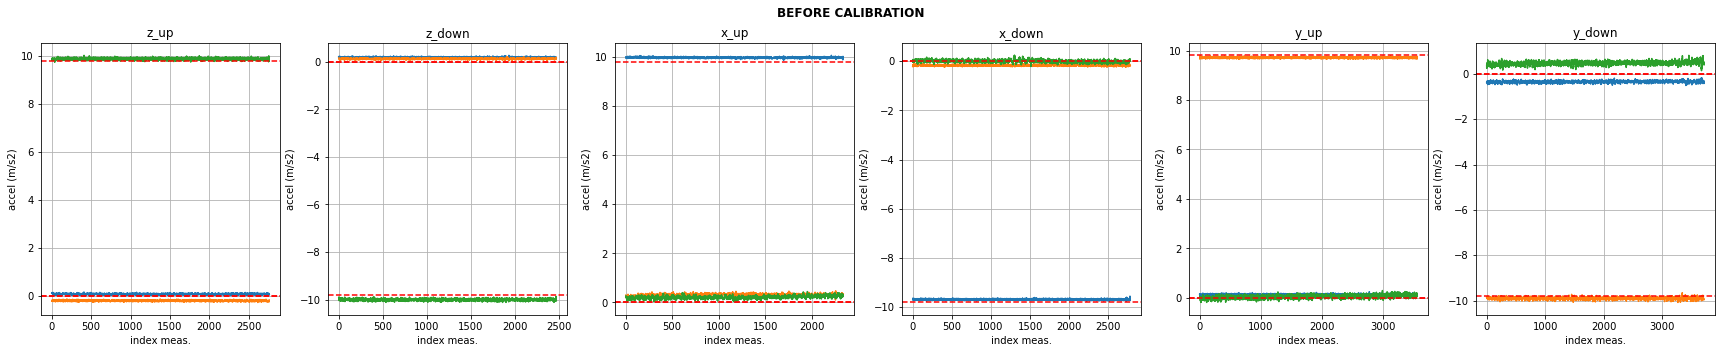

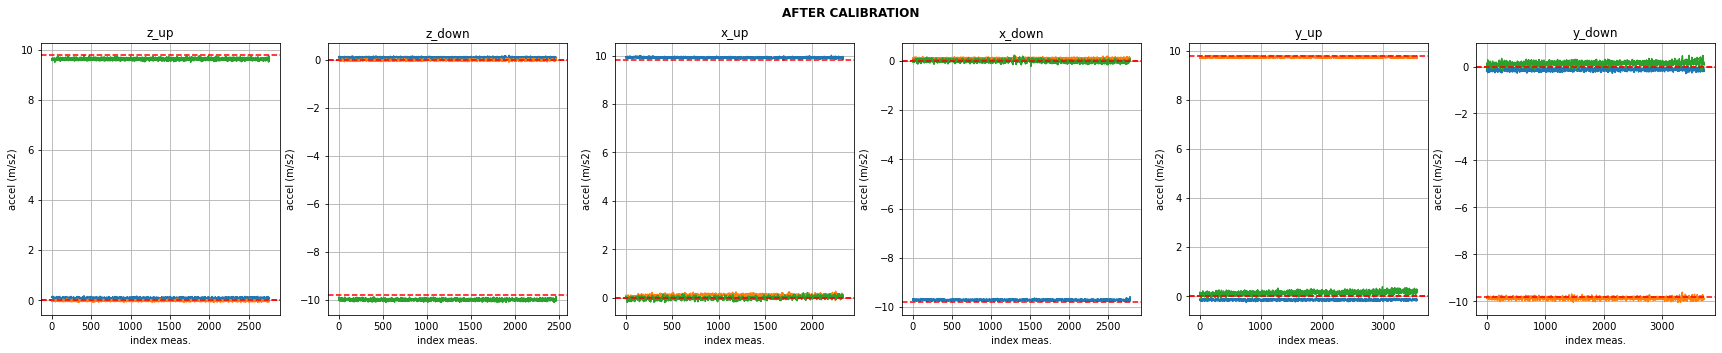

In [13]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# list of the six orientations
orientations = ["z_up", "z_down", "x_up", "x_down", "y_up", "y_down"]

#gravity constant
g = 9.80665 

#read the pkl file
with open('lab_imu_data.pkl', 'rb') as f:
    all_data = pickle.load(f)
    for key in all_data:
        all_data[key]=all_data[key].T
    
z = np.empty((0,1))
A = np.empty((0,12))
Mbar=None
bbar=None

# Construct matrix A and vector z
all_fhat = [(0,0,g),(0,0,-g),(g,0,0),(-g,0,0),(0,g,0),(0,-g,0)]  # expected sensed gravity vectors, corresponding to self.orientations
for index_orientation, str_orientation in enumerate(orientations):
    data=all_data[str_orientation]
    fhat = np.array(all_fhat[index_orientation]).reshape(3,1) # expected gravity vector at this orientation

    # construct A and z using measured gravity vectors
    for i in range(data.shape[1]): #Iterate through the measurements for this orientation
        z=np.concatenate((z,fhat), axis=0)
        A_this_measurement = np.hstack((np.kron(data[:,i].reshape(3,1).T,np.eye(3,3)), -np.eye(3)))
        # A_this_measurement = np.hstack((np.kron(np.eye(3,3),data[:,i]), -np.eye(3)))#If you use this option, then you have to use  Mbar = x[:9].reshape((3,3)), not Mbar = x[:9].reshape((3,3)).T
        A=np.concatenate((A,A_this_measurement), axis=0)
        

#Solve least squares problem
x, res, rnk, s = np.linalg.lstsq(A, z, rcond=None)


# Obtain Mbar and bbar (calibraton model) from the least squares solution
Mbar = x[:9].reshape((3,3)).T #Note that we need transpose due to the way the vectorization operator is defined, see https://en.wikipedia.org/wiki/Vectorization_(mathematics)
bbar = x[9:12]

def plotData(data_to_plot, fhat, str_orientation):
    ax=axes[index_orientation]; #arrangePlot('Position', 'p(t)')
    for i in range(3): 
        ax.plot(data_to_plot[i,:])
        ax.grid(); ax.set_title(str_orientation); ax.set_xlabel('index meas.'); ax.set_ylabel('accel (m/s2)');
        ax.axhline(y=fhat[i,0], color='r', linestyle='--')  

#Plots

##Before calibration
fig, axes = plt.subplots(1,6,figsize=(30, 5)); fig.suptitle("BEFORE CALIBRATION",fontweight="bold")
for index_orientation, str_orientation in enumerate(orientations):
    plotData(all_data[str_orientation], np.array(all_fhat[index_orientation]).reshape(3,1), str_orientation)
        
##After calibration
fig, axes = plt.subplots(1,6,figsize=(30, 5)); fig.suptitle("AFTER CALIBRATION",fontweight="bold")
for index_orientation, str_orientation in enumerate(orientations):
    data=all_data[str_orientation]
    f = Mbar @ data - bbar
    plotData(f, np.array(all_fhat[index_orientation]).reshape(3,1), str_orientation)

#Pring Mbar and bbar
print(f"Mbar is \n{Mbar}")
print(f"bbar is \n{bbar}")

| <font color='red'>Grading Issue</font>        | <font color='red'>Point Deduction</font> |
|-----------------------------------------------|------------------------------------------|
| incorrect/missing optimal $\bar{M}$ obtained    | -3                                       |
| incorrect/missing optimal $\bar{\mathbf{b}}$ obtained   | -3                                       |
| incorrect/missing plots                            | -3                                       |